In [1]:
''' Import packages/modules. '''

from scipy.interpolate import interp1d
import pywt
import tqdm
import numpy as np
import math
from copy import deepcopy
from scipy.fft import rfft, irfft, rfftfreq
from scipy import signal
import scipy.interpolate as sint
import h5py
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/elott1/code')

from ColorDataUtils.DDPIutils import DDPIutils
from NDNT.utils import DanUtils as DU

%load_ext autoreload
%autoreload 2

Invoking __init__.py for NDNT.utils


In [2]:
et_datadir = '/home/elott1/data/packaged/'
et_filename = 'J230331/Jocamo_230331_lam_CC_ETCC_nofix_v08'
et_f = h5py.File(et_datadir+et_filename+'.mat')

In [3]:
# ETgains = np.array(et_f['ETgains'])
# ETstim_location = np.array(et_f['ETstim_location'])
# ETtrace = np.array(et_f['ETtrace'])
# ETtrace_plex_calib = np.array(et_f['ETtrace_plex_calib'])
# ETtrace_raw = np.array(et_f['ETtrace_raw'])
# Robs = np.array(et_f['Robs'])
# Robs_probe_ID = np.array(et_f['Robs_probe_ID'])
# Robs_rating = np.array(et_f['Robs_rating'])
# RobsMU = np.array(et_f['RobsMU'])
# RobsMU_probe_ID = np.array(et_f['RobsMU_probe_ID'])
# RobsMU_rating = np.array(et_f['RobsMU_rating'])
# blockID = np.array(et_f['blockID'])
# block_inds = np.array(et_f['block_inds'], dtype=np.int32)
# cloud_binary = np.array(et_f['cloud_binary'])
# cloud_scale = np.array(et_f['cloud_scale'])
# datafilts = np.array(et_f['datafilts'])
# datafiltsMU = np.array(et_f['datafiltsMU'])
# dt = np.array(et_f['dt'])
# electrode_info = np.array(et_f['electrode_info'])
# exptdate = np.array(et_f['exptdate'])
# exptname = np.array(et_f['exptname'])
# fix_location = np.array(et_f['fix_location'])
# fix_size = np.array(et_f['fix_size'])
# fixdot = np.array(et_f['fixdot'])
# fixdotET = np.array(et_f['fixdotET'])
# pixel_size = np.array(et_f['pixel_size'])
# sacc_inds = np.array(et_f['sacc_inds'])
spk_IDs = np.array(et_f['spk_IDs']).squeeze()-1
spk_times = np.array(et_f['spk_times']).squeeze()
# stim = np.array(et_f['stim'])
# stimET = np.array(et_f['stimET'])
# stim_location = np.array(et_f['stim_location'])
# stimscale = np.array(et_f['stimscale'])
# stimtype = np.array(et_f['stimtype'])
# stimtypeET = np.array(et_f['stimtypeET'])
# trialID = np.array(et_f['trialID'])
trial_start_ts = np.array(et_f['trial_start_ts'])
useLeye = np.array(et_f['useLeye'])
useReye = np.array(et_f['useReye'])
valid_data = np.array(et_f['valid_data'])

In [4]:
''' Get all spikes with cell # and trial #. '''

full_spk = np.zeros([spk_times.shape[0],3])
for i, t in enumerate(spk_times):
    tr = t // 4
    full_spk[i] = [t, spk_IDs[i], tr]

In [5]:
''' Seperate spikes by trial. '''

num_tr = trial_start_ts.shape[0]
num_spk = np.zeros(num_tr, dtype=np.int32)
tr_spk = []
for tr in range(num_tr):
    idx = np.where(full_spk[:,2] == tr)[0]
    num_spk[tr] = idx.shape[0]
    spk = np.zeros([num_spk[tr], 2])
    spk[:,0] = full_spk[idx,0] - 4*tr
    spk[:,1] = full_spk[idx,1]
    tr_spk.append(spk)

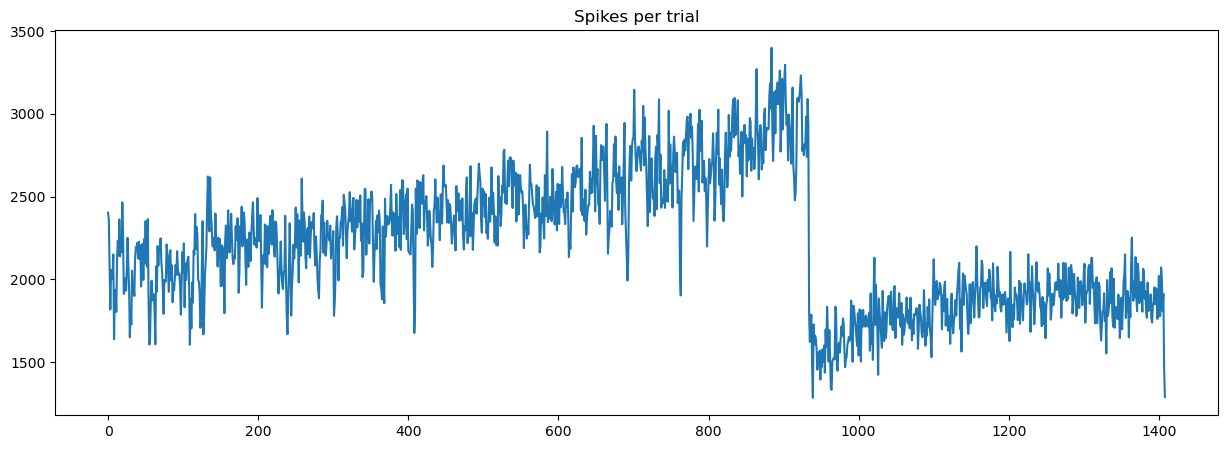

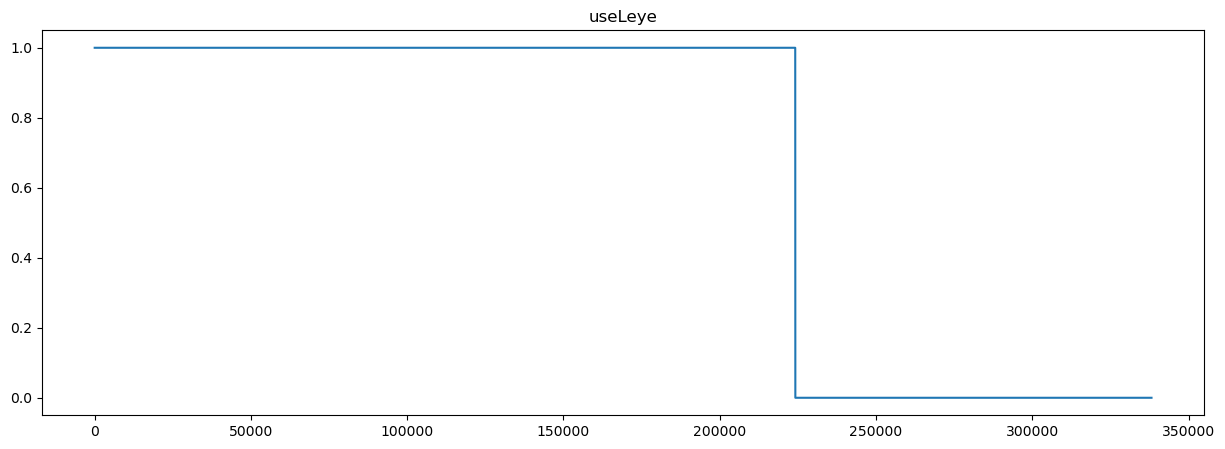

In [39]:
plt.figure(figsize=(15,5))
plt.plot(num_spk)
plt.title('Spikes per trial')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(useLeye)
plt.title('useLeye')
plt.show()

In [6]:
''' Load ET. '''

data_dir = '/home/dbutts/ColorV1/Data/'
f = 'Jocamo0331_dpi_calibrated'

data = DDPIutils(filename=f, data_dir=data_dir)

Seperating trials...
Done.


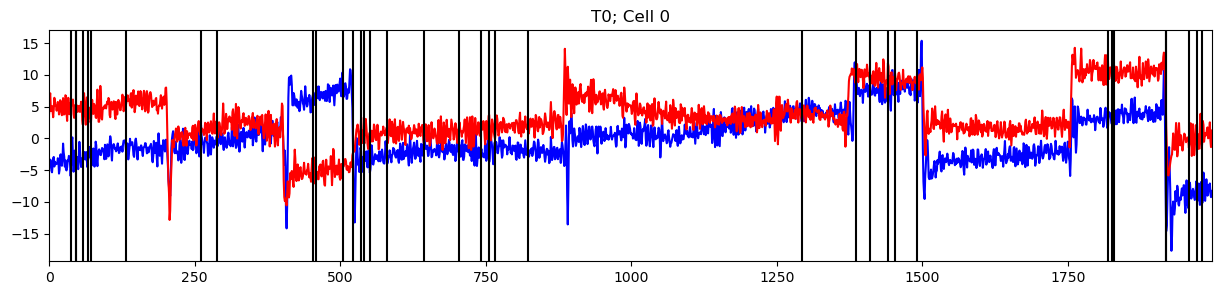

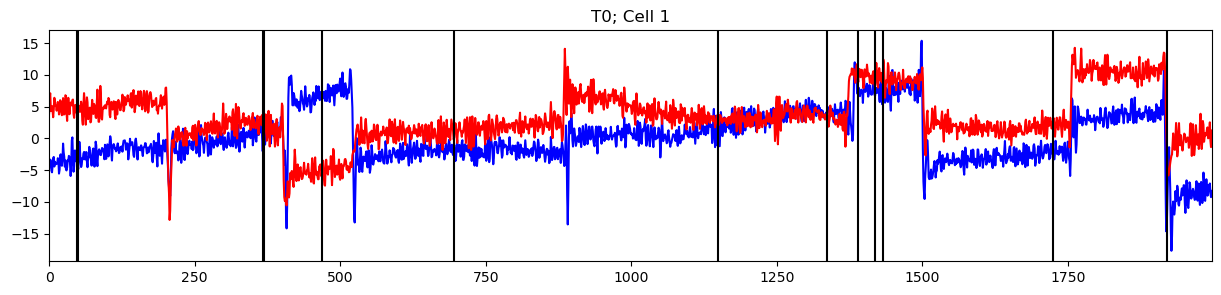

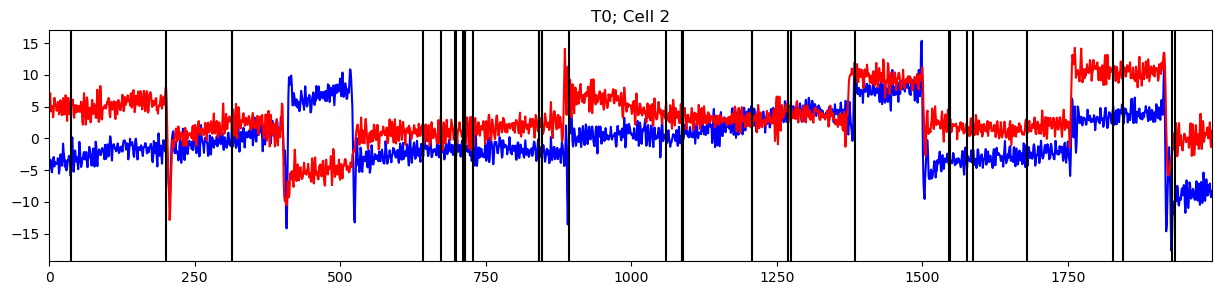

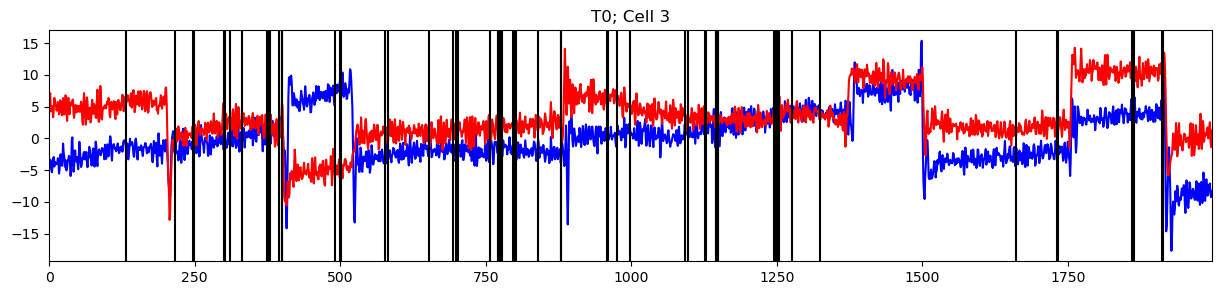

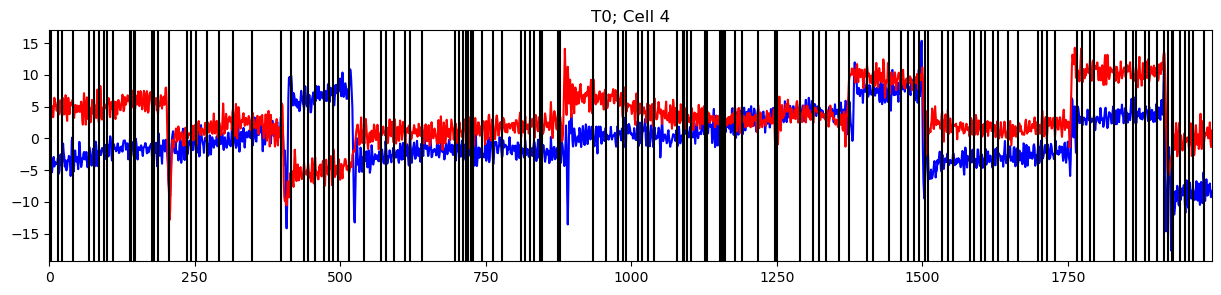

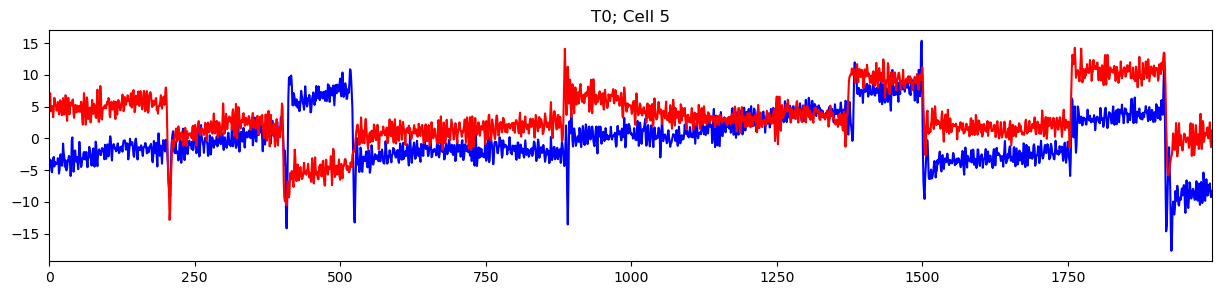

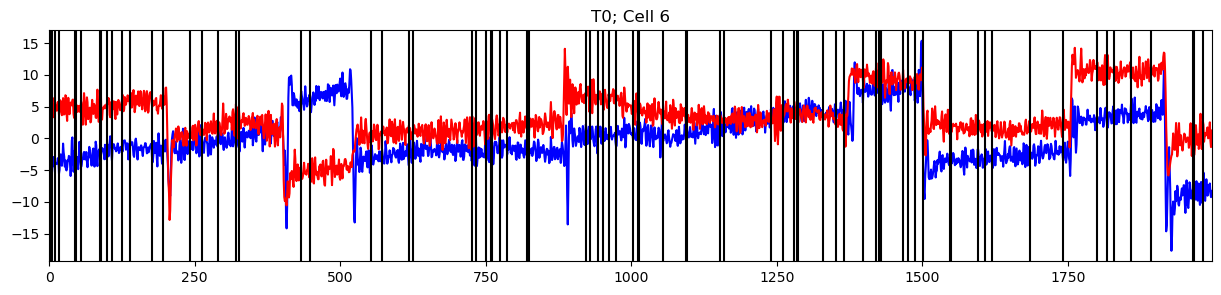

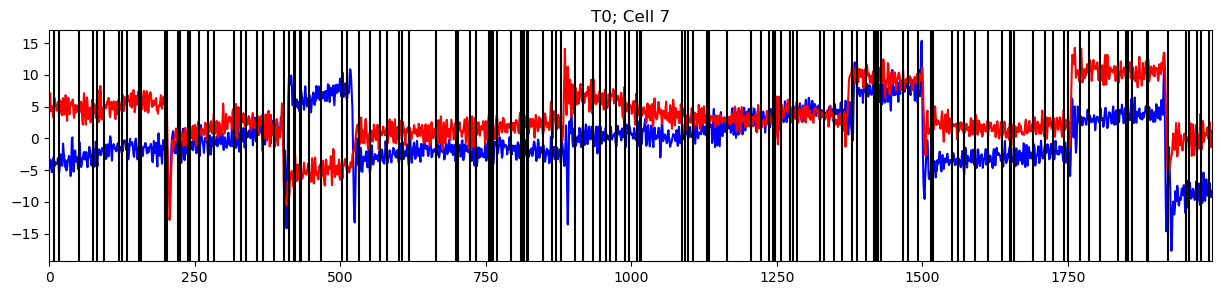

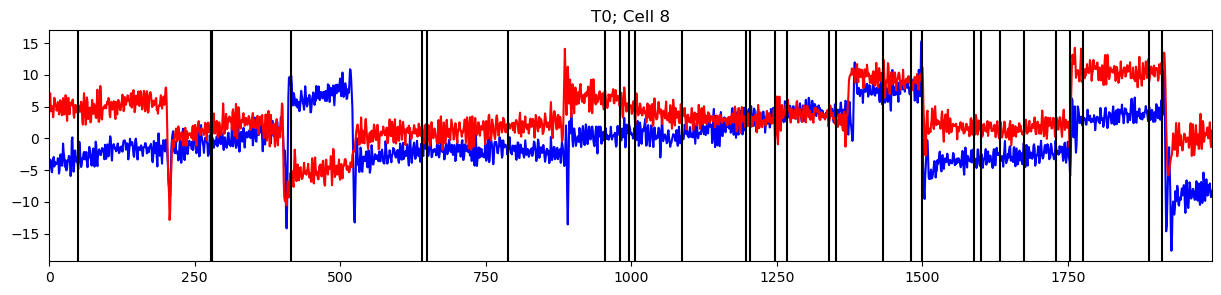

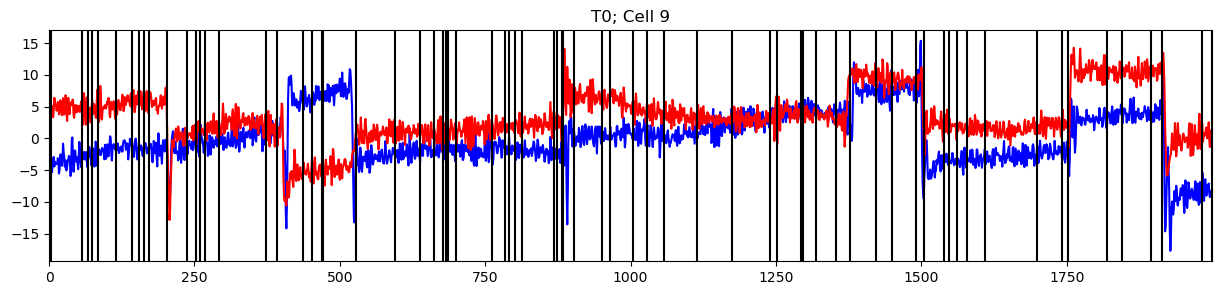

In [14]:
''' Process and plot a single trial w/ spikes. '''

tr = 0

if (data.processed[tr,0] == 0):
    data.process_trial(tr)
if (data.processed[tr,1] == 0):
    data.process_fixations(tr)

spk_idx = deepcopy(tr_spk[tr])
spk_idx[:,0] *= 500

for cell in range(10):
    plt.figure(figsize=(15,3))
    plt.margins(x=0)
    plt.title(f'T{tr}; Cell {cell}')
    plt.plot(data.trial_et[tr][:,1], color='blue')
    plt.plot(data.trial_et[tr][:,2], color='red')
    for spk in spk_idx:
        if spk[1] == cell:
            plt.axvline(x=spk[0], color='black')
    plt.show()